In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.autograd import Variable
from sklearn import datasets
import torch

In [2]:
read_data = datasets.load_iris()
data = read_data.data
target = read_data.target
data = pandas.DataFrame(data)
target = pandas.DataFrame(target)
data = pandas.concat([data, target], axis=1)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Split the data into train and test
train = data.sample(frac=0.8, random_state=200)
test = data.drop(train.index)

# Convert the data into tensors
train_x = torch.from_numpy(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values).float()
train_y = torch.from_numpy(train[['target']].values)
test_x = torch.from_numpy(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values).float()
test_y = torch.from_numpy(test[['target']].values)

In [4]:
class Model(nn.Module):
    def __init__(self, num_layers=3, hidden_size=16, activation=F.relu):
        super(Model, self).__init__()
        self.layers = nn.ModuleList()
        self.num_layers = num_layers
        self.activation = activation
        self.input_layer = nn.Linear(4, hidden_size)
        for i in range(num_layers - 1):
            self.layers.append(nn.Linear(hidden_size, hidden_size))
        self.output_layer = nn.Linear(hidden_size, 3)
        
    def forward(self, x):
        x = self.input_layer(x)
        x = self.activation(x)
        for i in range(self.num_layers - 1):
            x = self.layers[i](x)
            x = self.activation(x)
        x = self.output_layer(x)
        return x

In [5]:
# One hot encoding of the target
train_y_one_hot = F.one_hot(train_y.squeeze().long())
test_y_one_hot = F.one_hot(test_y.squeeze().long())

train_y_one_hot

tensor([[0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 

In [6]:
train_y_one_hot.shape

torch.Size([120, 3])

In [7]:
print(train_x.shape)
print(train_y_one_hot.shape)
print(test_x.shape)
print(test_y_one_hot.shape)
print(train_y.shape)
print(test_y.shape)

torch.Size([120, 4])
torch.Size([120, 3])
torch.Size([30, 4])
torch.Size([30, 3])
torch.Size([120, 1])
torch.Size([30, 1])


Epoch: 0, Loss: 1.1030614376068115
Epoch: 100, Loss: 1.1006057262420654
Epoch: 200, Loss: 1.0984030961990356
Epoch: 300, Loss: 1.0963894128799438
Epoch: 400, Loss: 1.0944256782531738
Epoch: 500, Loss: 1.0923523902893066
Epoch: 600, Loss: 1.0898537635803223
Epoch: 700, Loss: 1.087302327156067
Epoch: 800, Loss: 1.0845227241516113
Epoch: 900, Loss: 1.0815434455871582
Epoch: 1000, Loss: 1.0787917375564575
Epoch: 1100, Loss: 1.0759042501449585
Epoch: 1200, Loss: 1.072838544845581
Epoch: 1300, Loss: 1.0695672035217285
Epoch: 1400, Loss: 1.065999150276184
Epoch: 1500, Loss: 1.0620630979537964
Epoch: 1600, Loss: 1.0577439069747925
Epoch: 1700, Loss: 1.0529876947402954
Epoch: 1800, Loss: 1.0477802753448486
Epoch: 1900, Loss: 1.0420259237289429
Epoch: 2000, Loss: 1.0356616973876953
Epoch: 2100, Loss: 1.0287044048309326
Epoch: 2200, Loss: 1.0210093259811401
Epoch: 2300, Loss: 1.0123063325881958
Epoch: 2400, Loss: 1.002440094947815
Epoch: 2500, Loss: 0.9912684559822083
Epoch: 2600, Loss: 0.9788133

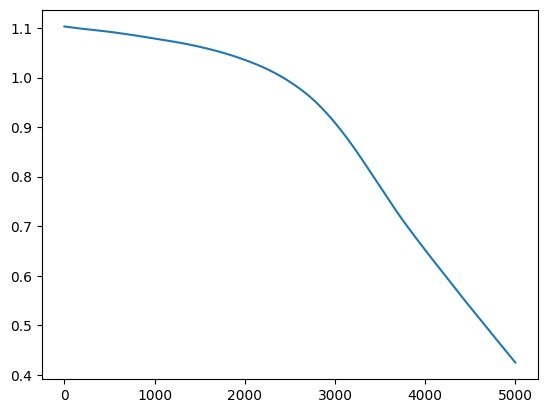

In [8]:
model = Model(num_layers=5, hidden_size=32, activation=F.leaky_relu)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
losses = []
for epoch in range(5000):
    optimizer.zero_grad()
    out = model(train_x)
    train_y_one_hot = train_y_one_hot.float()
    loss = criterion(out, train_y_one_hot)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('Epoch: {}, Loss: {}'.format(epoch, loss.item()))

plt.plot(losses)
plt.show()

In [9]:
# Predict the test data
out = model(test_x)
_, predicted = torch.max(out.data, 1)
print('Predicted: ', predicted)
print('Actual: ', test_y.squeeze())

# Calculate the accuracy
correct = 0
total = len(predicted)
for i in range(total):
    if predicted[i] == test_y[i]:
        correct += 1
print('Accuracy of the network on the 30 test images: %d %%' % (
    100 * correct / total))

Predicted:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])
Actual:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2], dtype=torch.int32)
Accuracy of the network on the 30 test images: 90 %
